In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar e filtrar dados
df = pd.read_csv('lol.csv')


<ipython-input-1-b80fe87cd9eb>:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lol.csv')


In [ ]:
print(f"Shape: {df.shape}")
print("\nInformações básicas:")
print(df.info())
print("\nValores únicos por coluna:")
print(df.nunique())
print("\nEstatísticas descritivas:")
print(df.describe(include='all'))

Shape: (10800, 161)

Informações básicas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Columns: 161 entries, gameid to opp_deathsat25
dtypes: float64(118), int64(20), object(23)
memory usage: 13.3+ MB
None

Valores únicos por coluna:
gameid              900
datacompleteness      2
url                  21
league               23
year                  1
                   ... 
assistsat25          18
deathsat25           11
opp_killsat25        11
opp_assistsat25      18
opp_deathsat25       11
Length: 161, dtype: int64

Estatísticas descritivas:
                  gameid datacompleteness  \
count              10800            10800   
unique               900                2   
top     LOLTMNT03_179647         complete   
freq                  12             9876   
mean                 NaN              NaN   
std                  NaN              NaN   
min                  NaN              NaN   
25%                  NaN              NaN   
50%          

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_bar, ggtitle, labs, theme

# Carregar e filtrar dados
df = pd.read_csv('lol.csv')
df = df[(df['datacompleteness'] == 'complete') & (df['participantid'].isin([100,200]))]

<ipython-input-1-a6c827db2075>:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.


KeyboardInterrupt: 

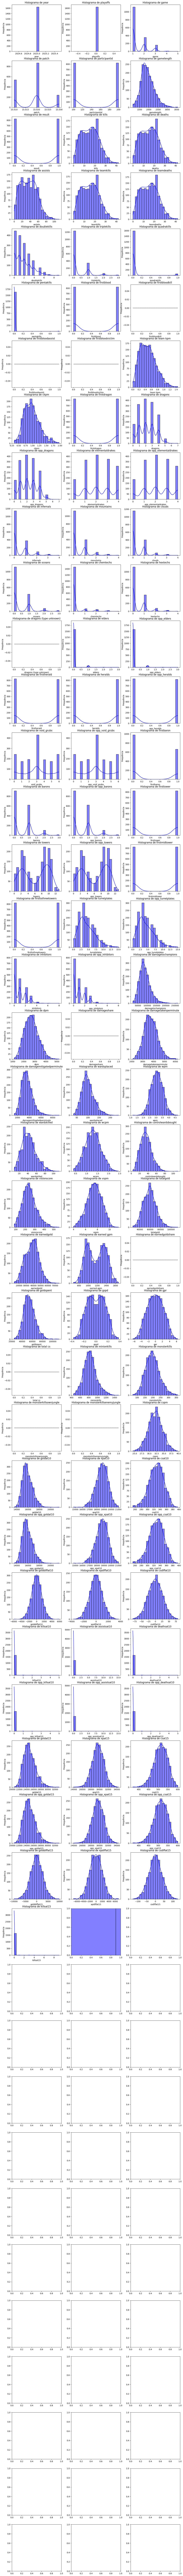

In [ ]:
# Verificar as variáveis quantitativas (numéricas) no DataFrame
quantitative_cols = df.select_dtypes(include=[np.number]).columns

# Definir o número de colunas para os subgráficos
num_cols = 3  # Você pode ajustar este valor conforme necessário
num_rows = int(np.ceil(len(quantitative_cols) / num_cols))

# Criar os subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Se houver apenas uma linha ou coluna, o axes será um único objeto, então precisamos garantir que seja uma lista
axes = axes.flatten()

# Criar um histograma para cada variável quantitativa
for i, col in enumerate(quantitative_cols):
    sns.histplot(df[col], kde=True, bins=20, color='blue', ax=axes[i])
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Ajustar o layout para que os gráficos não se sobreponham
plt.tight_layout()
plt.show()



In [ ]:
print(f"Shape: {df.shape}")
print("\nInformações básicas:")
print(df.info())
print("\nValores únicos por coluna:")
print(df.nunique())
print("\nEstatísticas descritivas:")
print(df.describe(include='all'))

Shape: (1646, 161)

Informações básicas:
<class 'pandas.core.frame.DataFrame'>
Index: 1646 entries, 10 to 10799
Columns: 161 entries, gameid to opp_deathsat25
dtypes: float64(118), int64(20), object(23)
memory usage: 2.0+ MB
None

Valores únicos por coluna:
gameid              823
datacompleteness      1
url                   0
league               22
year                  1
                   ... 
assistsat25          13
deathsat25            9
opp_killsat25         9
opp_assistsat25      13
opp_deathsat25        9
Length: 161, dtype: int64

Estatísticas descritivas:
                  gameid datacompleteness  url league    year   split  \
count               1646             1646    0   1646  1646.0    1530   
unique               823                1    0     22     NaN       7   
top     LOLTMNT03_179647         complete  NaN    LCK     NaN  Winter   
freq                   2             1646  NaN    164     NaN     796   
mean                 NaN              NaN  NaN    NaN  2025.

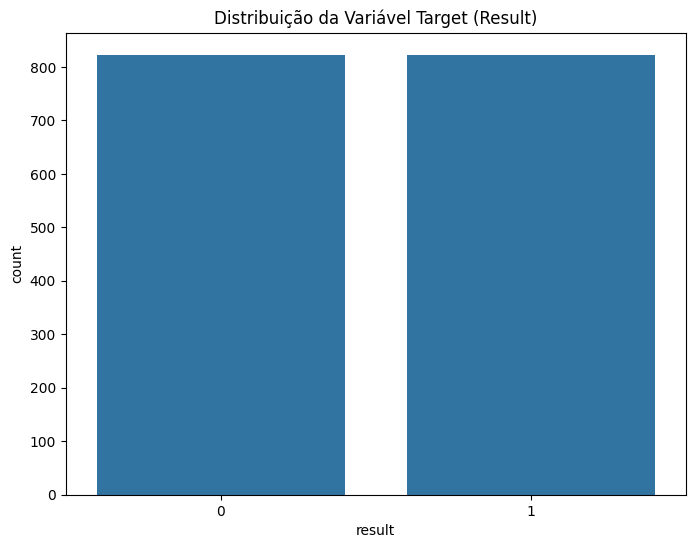


Proporção de vitórias:
result
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='result', data=df)
plt.title('Distribuição da Variável Target (Result)')
plt.show()

print("\nProporção de vitórias:")
print(df['result'].value_counts(normalize=True))

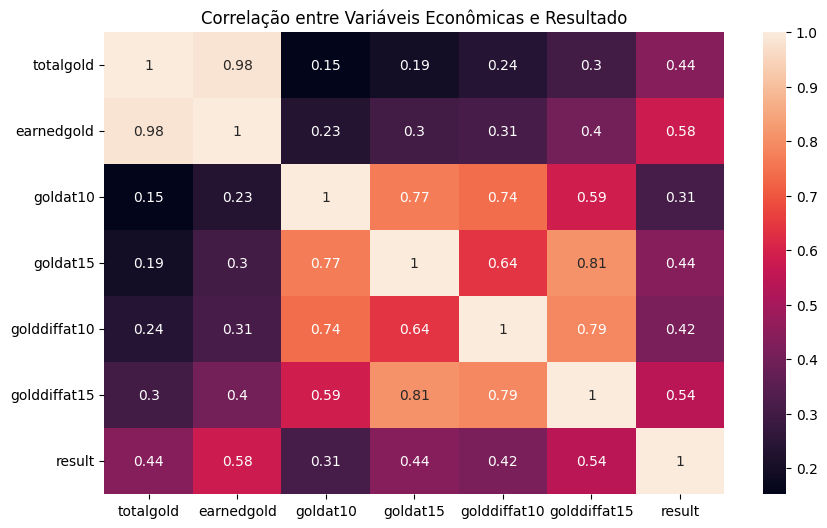

In [ ]:
economy_vars = ['totalgold','earnedgold','goldat10','goldat15','golddiffat10','golddiffat15']

plt.figure(figsize=(10,6))
sns.heatmap(df[economy_vars + ['result']].corr(), annot=True)
plt.title('Correlação entre Variáveis Econômicas e Resultado')
plt.show()


In [ ]:
!pip install met_brewer


  Preparing metadata (setup.py) ... done
  Created wheel for met_brewer: filename=met_brewer-1.0.2-py3-none-any.whl size=11234 sha256=d1df32f17166b7ce37318eef3e7390bbdc3e4e5d931ea15bd4d0773327ffad72
  Stored in directory: /root/.cache/pip/wheels/4c/56/d2/af72b048a8a0ad0589ab1f709f53a84778392be5893a810b4b
Successfully built met_brewer


In [ ]:
from plotnine import ggplot, aes, geom_bar, geom_text, ggtitle, labs, theme, scale_fill_manual
from met_brewer import met_brew

# Converte a variável 'result' para string (evita erro de escala)
df['result'] = df['result'].astype(str)

# Calcula os counts e porcentagens para cada categoria de 'result'
df_counts = df['result'].value_counts().rename_axis('result').reset_index(name='count')
df_counts['percentage'] = (df_counts['count'] / df_counts['count'].sum() * 100).round(1)
df_counts['percentage_label'] = df_counts['percentage'].astype(str) + '%'

# Define a paleta "Hokusai1" do MetBrewer
hokusai_palette = met_brew("Pillement", n=len(df_counts['result'].unique()), brew_type="discrete")

# Cria o gráfico
grafico = (ggplot(df, aes(x='result', fill='result')) +
           geom_bar(color='black') +
           geom_text(data=df_counts,
                     mapping=aes(x='result', y='count', label='percentage_label'),
                     va='bottom', nudge_y=10) +
           scale_fill_manual(values=hokusai_palette) +  # Usa a paleta MetBrewer
           ggtitle('') +
           labs(x='Result', y='Contagem', fill='Categoria') +
           theme(figure_size=(8, 6)))

print(grafico)

# Impressão da proporção de vitórias
print("\nProporção de vitórias:")
print(df['result'].value_counts(normalize=True))


<ggplot: (800 x 600)>

Proporção de vitórias:
result
0    0.5
1    0.5
Name: proportion, dtype: float64


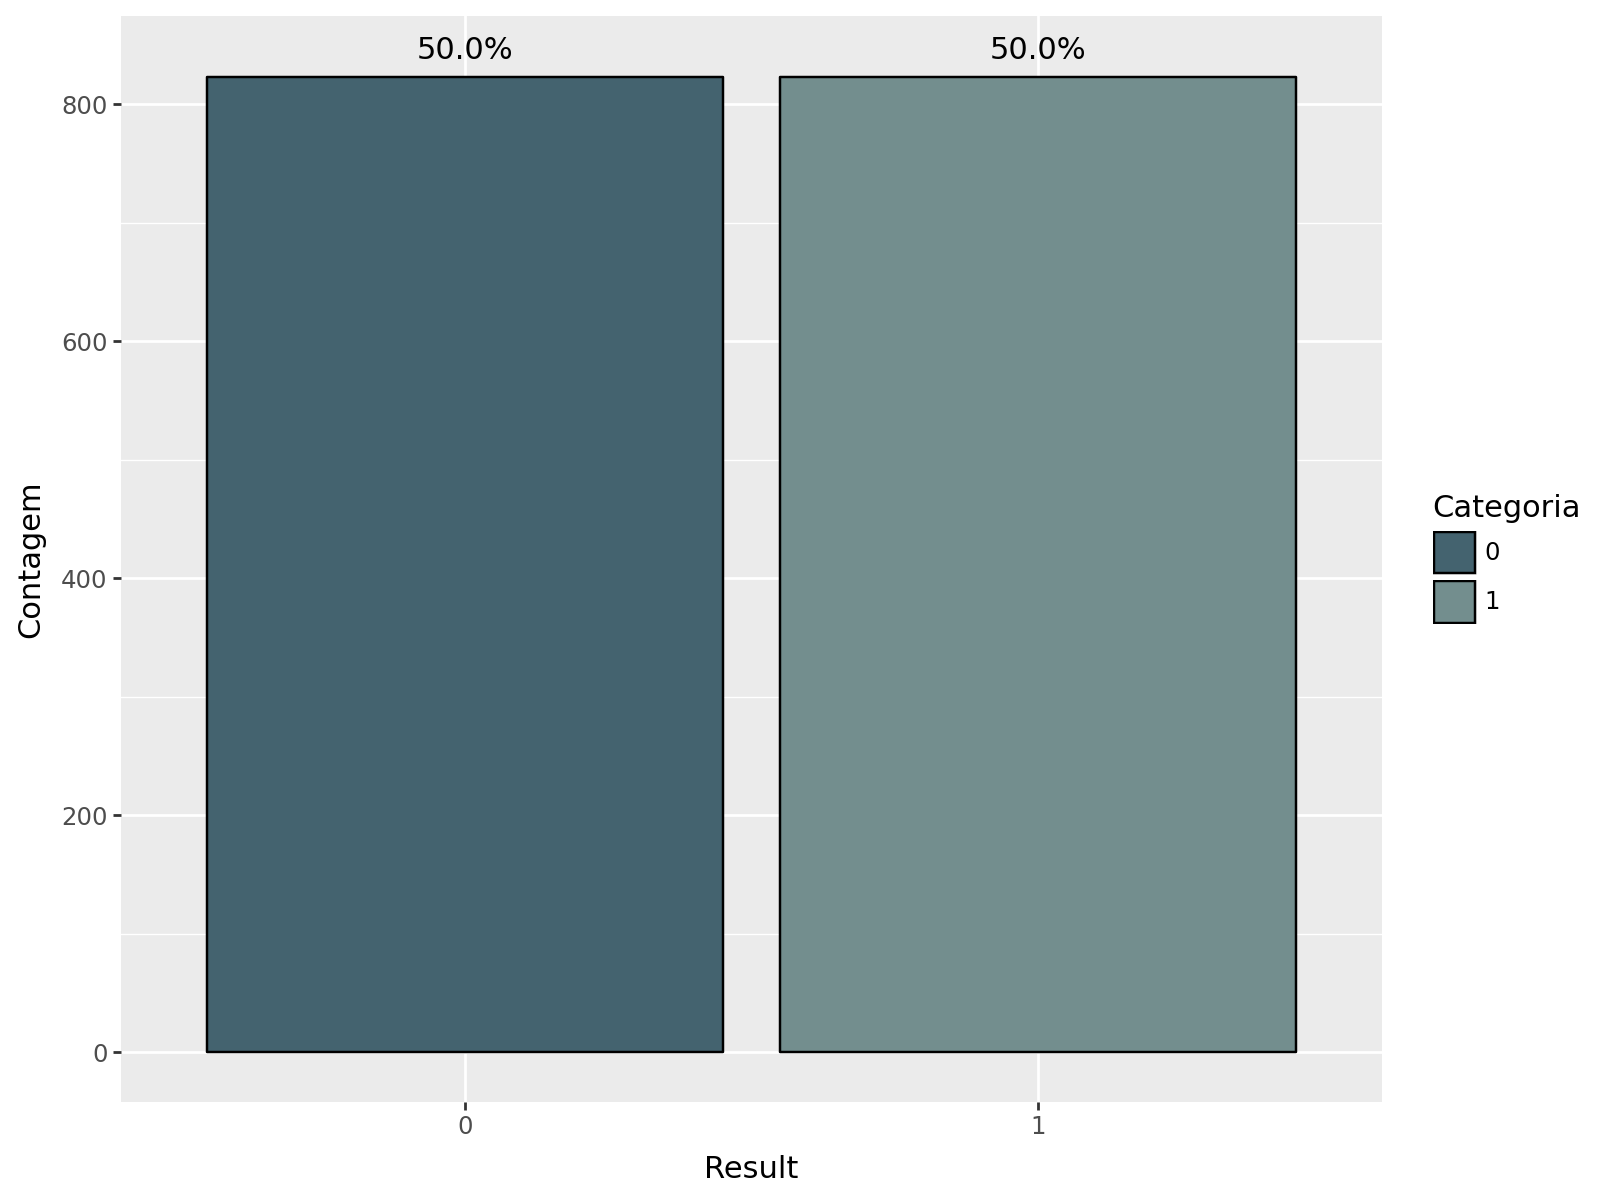

In [ ]:
grafico

<ipython-input-158-09bbe77f3b0f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<ipython-input-158-09bbe77f3b0f>:18: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
<ipython-input-158-09bbe77f3b0f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<ipython-input-158-09bbe77f3b0f>:18: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
<ipython-input-158-09bbe77f3b0f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<ipython-input-158-09bbe77f3b0f>:18: UserWarning: The palette list has more va

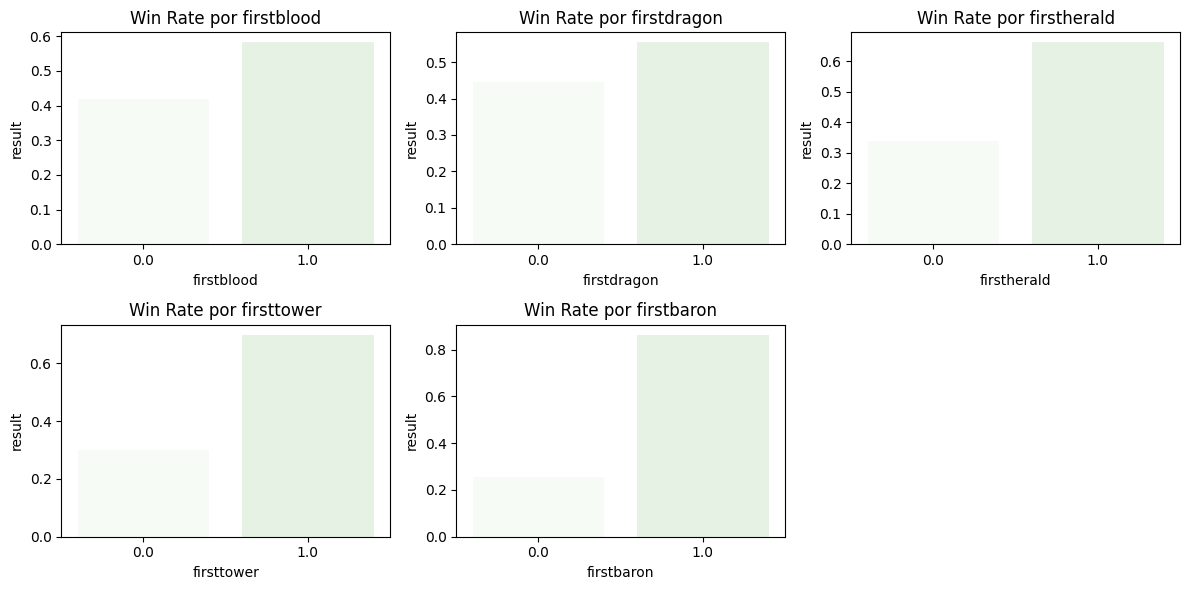

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Definir uma paleta personalizada para se aproximar da paleta Pillment
pillment_colors = ["#f7fcf5", "#e5f5e0", "#c7e9c0", "#a1d99b", "#74c476"]

# Lista de objetivos
first_vars = ['firstblood', 'firstdragon', 'firstherald', 'firsttower', 'firstbaron']

# Configuração do gráfico
plt.figure(figsize=(12, 6))

# Criando os gráficos para cada variável
for i, var in enumerate(first_vars, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=var, y='result', data=df, errorbar=None, palette=pillment_colors)  # Aplica a paleta personalizada
    plt.title(f'Win Rate por {var}')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Criar a tabela com a taxa de vitória por objetivo
win_rates = {var: df.groupby(var)['result'].mean() for var in first_vars}

# Transformar em DataFrame
win_rates_df = pd.DataFrame(win_rates).T
win_rates_df.columns = ["Taxa de Vitória (0)", "Taxa de Vitória (1)"]

# Exibir a tabela
print(win_rates_df)


             Taxa de Vitória (0)  Taxa de Vitória (1)
firstblood              0.417983             0.582017
firstdragon             0.445930             0.554070
firstherald             0.339372             0.662592
firsttower              0.301337             0.698663
firstbaron              0.253823             0.863158


In [ ]:
from plotnine import ggplot, aes, geom_bar, facet_wrap, labs, theme_minimal, scale_fill_manual
import pandas as pd
from met_brewer import met_brew

# Supondo que df_filtered já esteja definido e contendo as colunas necessárias
first_vars = ['firstblood', 'firstdragon', 'firstherald', 'firsttower', 'firstbaron']

# Definir a paleta "Pillement" do MetBrewer com 2 cores (para vitória e derrota)
pillment_palette = met_brew("Pillement", n=2, brew_type="discrete")

# Criando um DataFrame "tidy" para o plotnine
df_melted = df_filtered.melt(id_vars=['result'], value_vars=first_vars, var_name='first_objective', value_name='value')

# Criando o gráfico com plotnine
plot = (ggplot(df_melted)
        + aes(x='value', fill='factor(result)')
        + geom_bar(stat='count', position='dodge')
        + facet_wrap('~first_objective', ncol=3)
        + labs(title='', x='First Objective', y='Contagem')
        + theme_minimal() +
        theme(figure_size=(8, 6))
        + scale_fill_manual(values=pillment_palette)  # Aplicando a paleta do MetBrewer
       )

print(plot)


<ggplot: (800 x 600)>


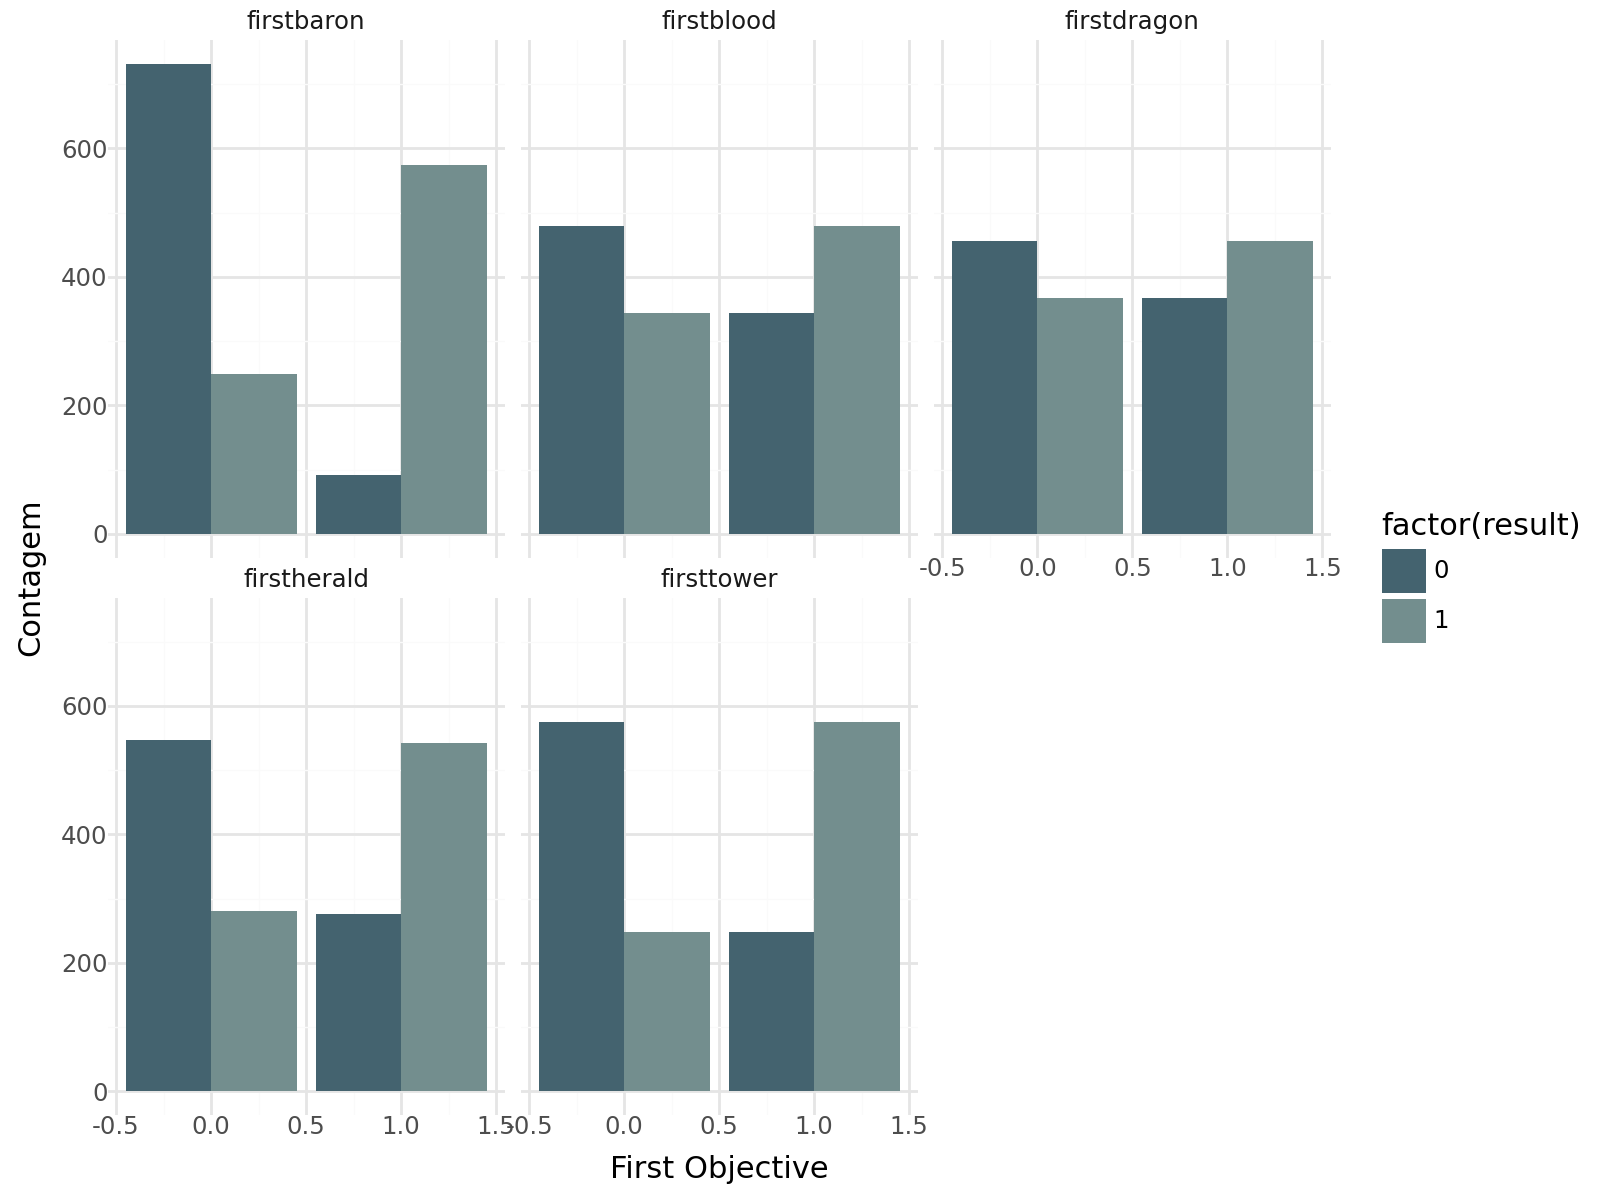

In [ ]:
plot

In [ ]:
from plotnine import ggplot, aes, geom_bar, facet_wrap, labs, theme_minimal, scale_fill_manual
import pandas as pd

# Supondo que df_filtered já esteja definido e contendo as colunas necessárias
first_vars = ['firstblood', 'firstdragon', 'firstherald', 'firsttower', 'firstbaron']

# Criando um DataFrame "tidy" para o plotnine
df_melted = df_filtered.melt(id_vars=['result'], value_vars=first_vars, var_name='first_objective', value_name='value')

# Criando o gráfico com plotnine
plot = (ggplot(df_melted)
        + aes(x='value', fill='factor(result)')
        + geom_bar(stat='count', position='dodge')
        + facet_wrap('~first_objective', ncol=3)
        + labs(title='Win Rate por First Objectives', x='First Objective', y='Contagem')
        + theme_minimal()
        + scale_fill_manual(values=["#1f77b4", "#ff7f0e"])  # Cores para vitória (1) e derrota (0)
       )

print(plot)

<ggplot: (640 x 480)>


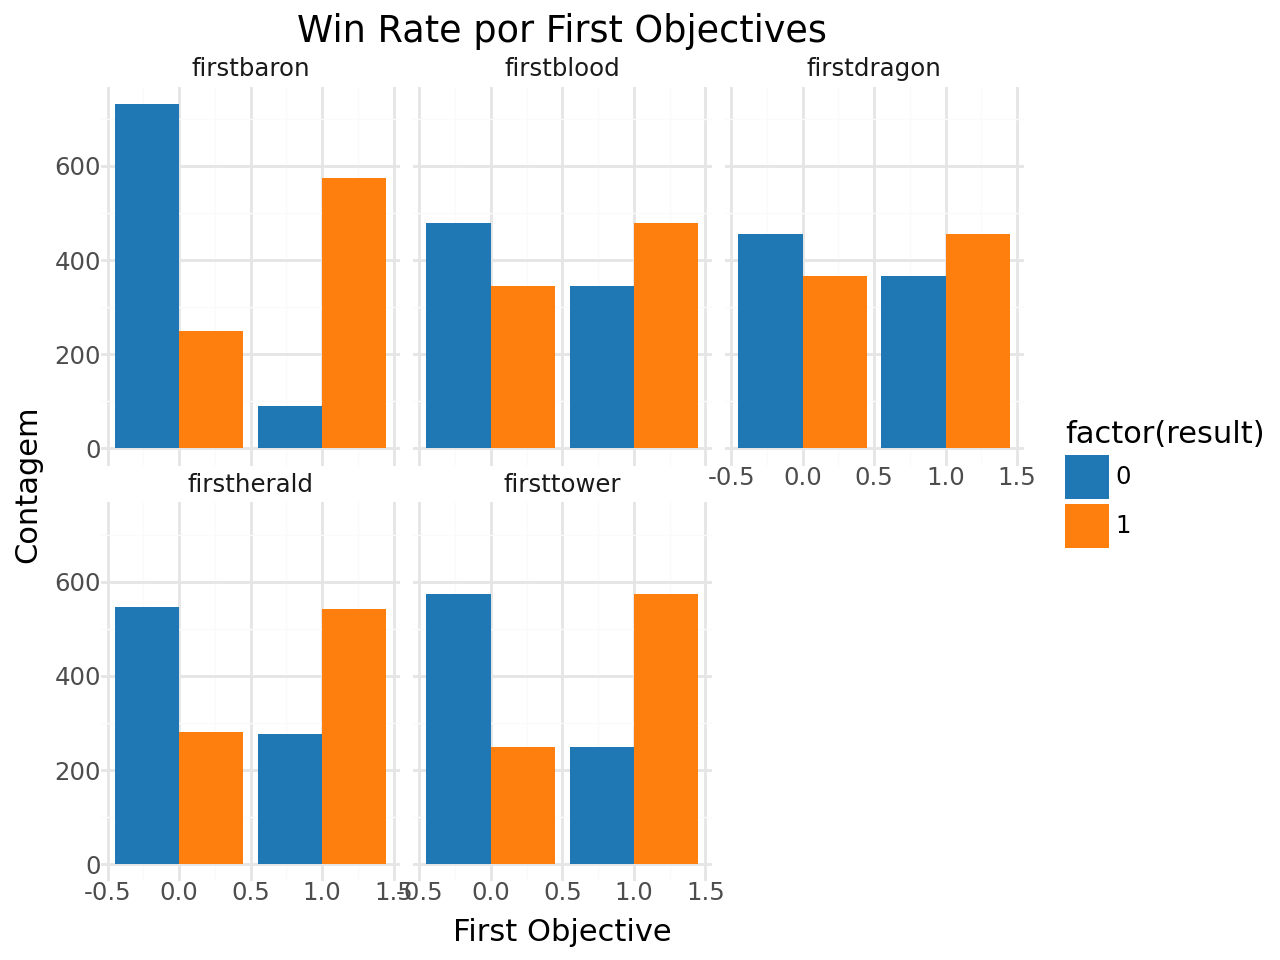

In [ ]:
plot

In [ ]:
from plotnine import *
import pandas as pd
import numpy as np

# Definir manualmente as cores da paleta Hokusai
hokusai_colors = ["#3B3B58", "#445E93", "#688EC1", "#A8C0D9", "#D6DDE0"]

# Lista de objetivos
first_vars = ['firstblood', 'firstdragon', 'firstherald', 'firsttower', 'firstbaron']

# Transformar o dataset para formato longo (melt)
df_long = df.melt(id_vars=['result'], value_vars=first_vars, var_name='Objetivo', value_name='Conquistado')

# Calcular a taxa de vitória para cada objetivo e resultado (0 e 1)
df_summary = df_long.groupby(['Objetivo', 'result']).size().reset_index(name='Count')
df_summary['Total'] = df_summary.groupby('Objetivo')['Count'].transform('sum')
df_summary['Win Rate'] = df_summary['Count'] / df_summary['Total']

# Criar o gráfico de barras
p = (
    ggplot(df_summary, aes(x='Objetivo', y='Win Rate', fill='factor(result)')) +  # 'factor(result)' para distinguir 0 e 1
    geom_bar(stat="identity", position='dodge') +  # Gráfico de barras
    scale_fill_manual(values=["#1f77b4", "#ff7f0e"]) +  # Cores distintas para 0 e 1
    labs(title="Taxa de Vitória por First Objective e Resultado", x="First Objective", y="Win Rate") +
    theme_minimal() +
    theme(legend_title=element_blank(), legend_position="top")
)

print(p)


<ggplot: (640 x 480)>


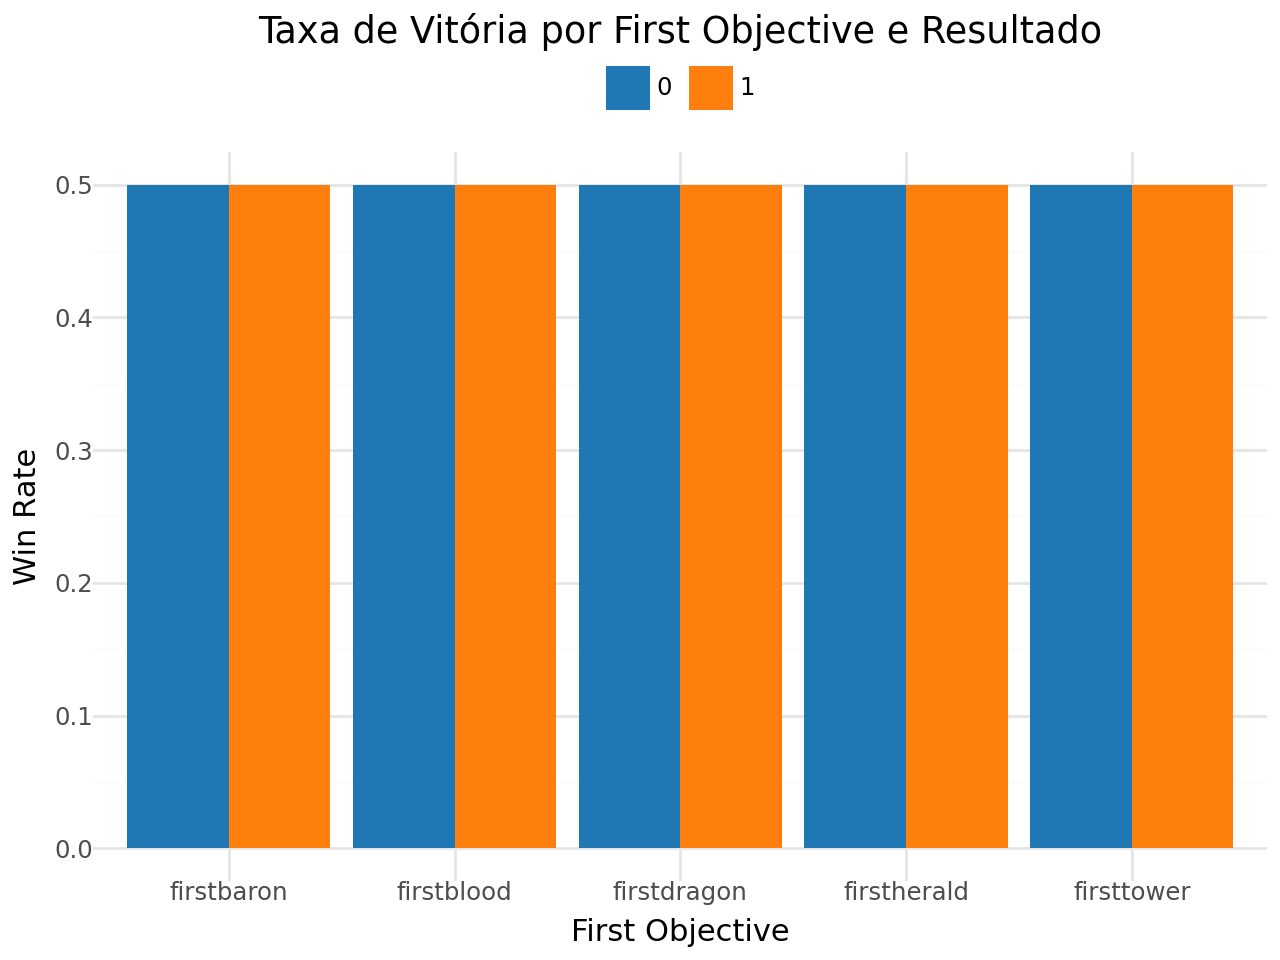

In [ ]:
p

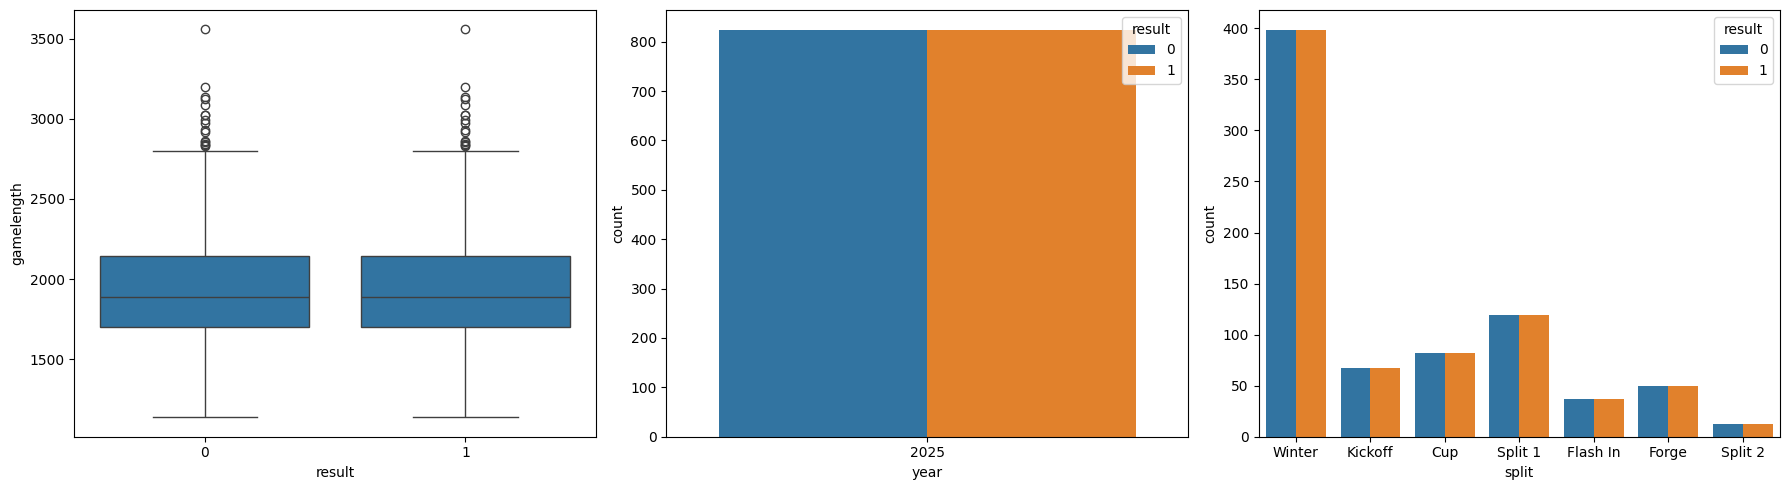

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(18,5))
sns.boxplot(x='result', y='gamelength', data=df, ax=axs[0])
sns.countplot(x='year', hue='result', data=df, ax=axs[1])
sns.countplot(x='split', hue='result', data=df, ax=axs[2])
plt.tight_layout()

<Figure size 1200x800 with 0 Axes>

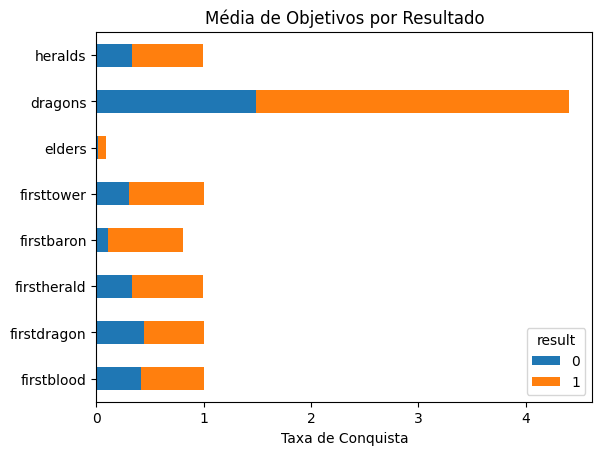

In [ ]:
objectives = ['firstblood','firstdragon','firstherald','firstbaron','firsttower','elders','dragons','heralds']

plt.figure(figsize=(12,8))
df_objetivos = df.groupby('result')[objectives].mean().T
df_objetivos.plot(kind='barh', stacked=True)
plt.title('Média de Objetivos por Resultado')
plt.xlabel('Taxa de Conquista')
plt.show()

In [ ]:
from plotnine import ggplot, aes, geom_bar, facet_wrap, labs, theme_minimal, scale_fill_manual, coord_flip
import pandas as pd

# Definir a nova paleta personalizada
custom_palette = [ "#72898d", "#3f5a66", "#2d3d4b", "#0d1a21", "#a0714f", "#5c6c4d"]

# Agrupar e calcular a média
df_objetivos = df.groupby('result')[objectives].mean().reset_index()

# Converter para formato longo
df_long = df_objetivos.melt(id_vars='result', var_name='Objetivo', value_name='Taxa de Conquista')

# Criar o gráfico
g = (ggplot(df_long, aes(x='Objetivo', y='Taxa de Conquista', fill='factor(result)')) +
     geom_bar(stat='identity', position='dodge') +
     scale_fill_manual(values=custom_palette) +
     labs(title='Média de Objetivos por Resultado', x='Objetivo', y='Taxa de Conquista', fill='Resultado') +
     theme_minimal() +
     coord_flip())  # Inverte os eixos para barras horizontais

print(g)


<ggplot: (640 x 480)>


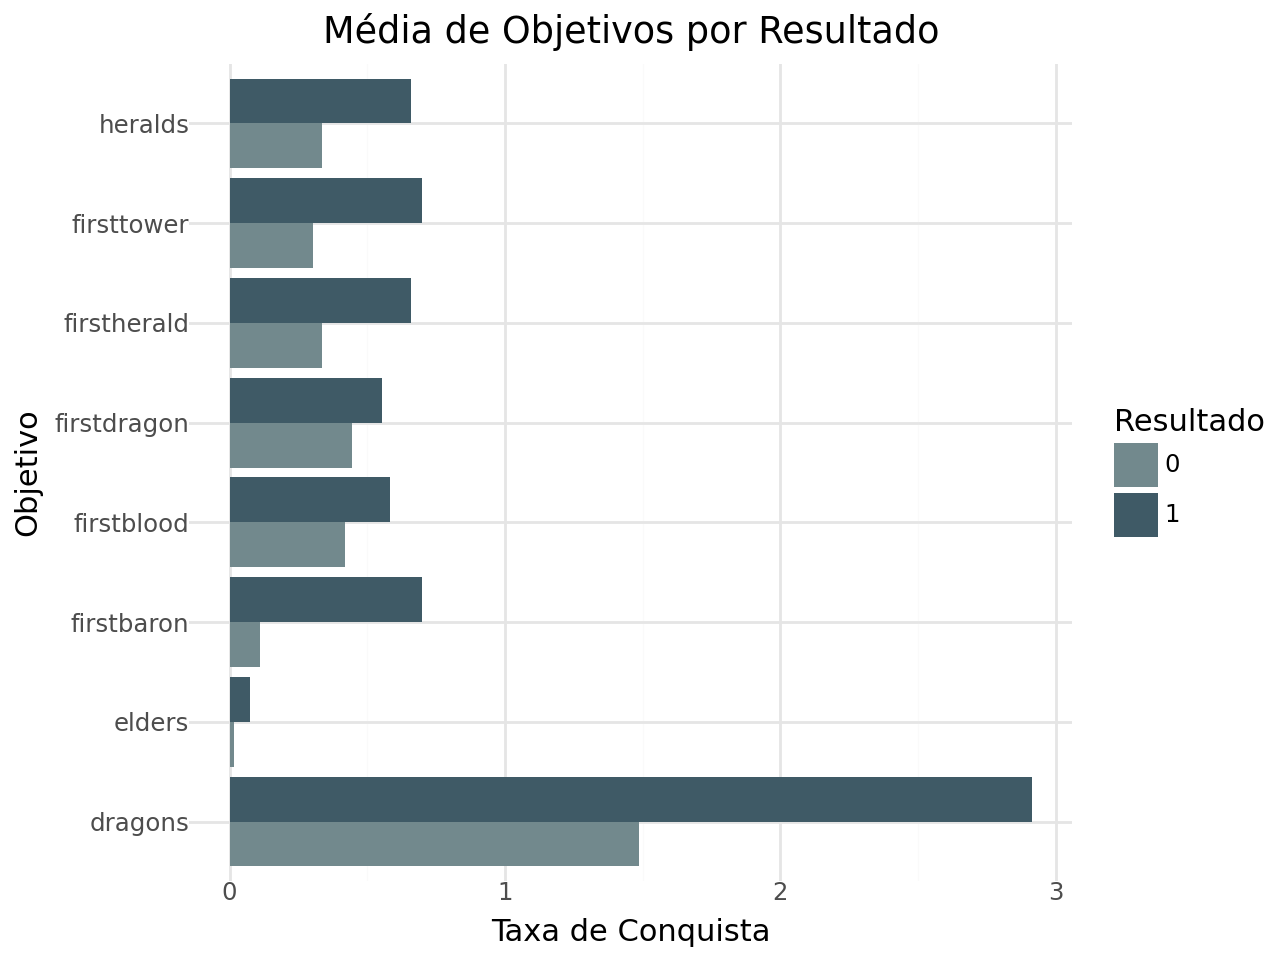

In [ ]:
g

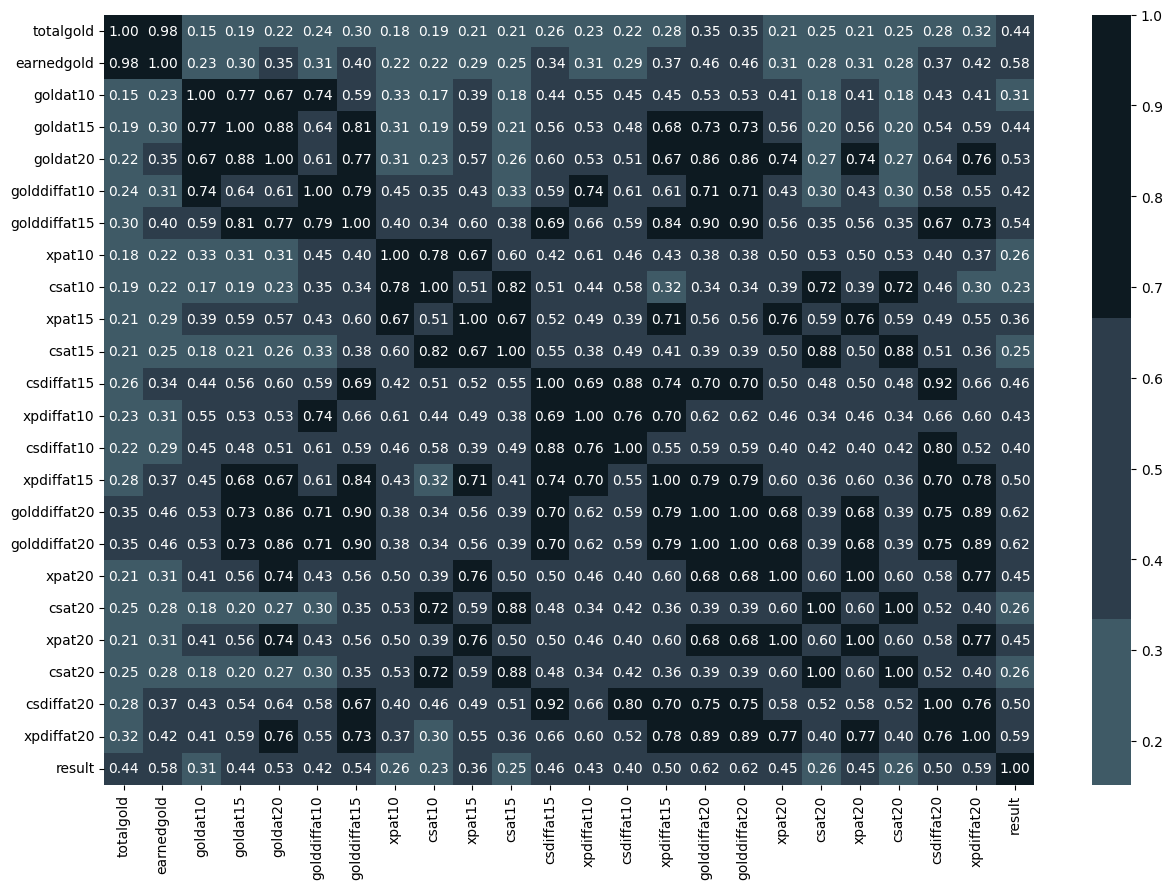

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definindo a paleta baseada na imagem
custom_palette = ["#a0714f", "#5c6c4d", "#72898d", "#3f5a66", "#2d3d4b", "#0d1a21"]

# Criando um mapa de cores personalizado
cmap = sns.color_palette(custom_palette, as_cmap=True)

economy_vars = ['totalgold','earnedgold','goldat10','goldat15', 'goldat20','golddiffat10','golddiffat15',
                'xpat10', 'csat10', 'xpat15', 'csat15', 'csdiffat15', 'xpdiffat10',
                'csdiffat10', 'xpdiffat15', 'golddiffat20','golddiffat20',
                'xpat20', 'csat20', 'xpat20', 'csat20', 'csdiffat20', 'xpdiffat20']

plt.figure(figsize=(15, 10))
sns.heatmap(df[economy_vars + ['result']].corr(), fmt=".2f", cmap=cmap, center=0, annot=True)
plt.title('')
plt.show()


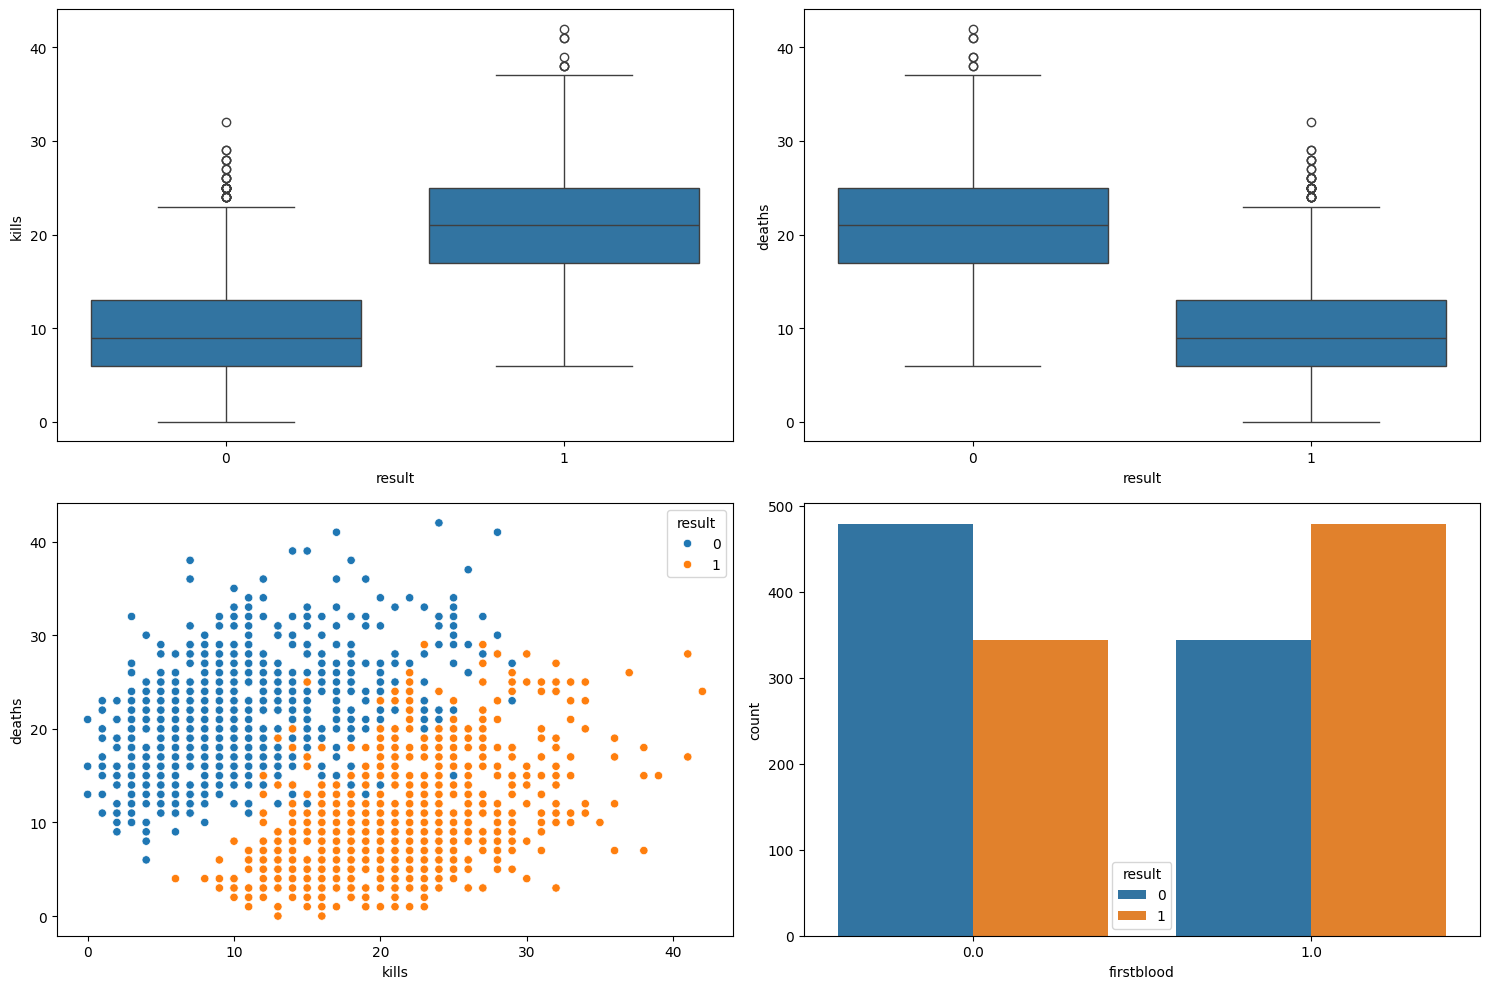

In [ ]:
combat_vars = ['kills','deaths','assists','teamkills','teamdeaths','doublekills','triplekills']

fig, axs = plt.subplots(2,2, figsize=(15,10))
sns.boxplot(x='result', y='kills', data=df, ax=axs[0,0])
sns.boxplot(x='result', y='deaths', data=df, ax=axs[0,1])
sns.scatterplot(x='kills', y='deaths', hue='result', data=df, ax=axs[1,0])
sns.countplot(x='firstblood', hue='result', data=df, ax=axs[1,1])
plt.tight_layout()

<Figure size 1000x600 with 0 Axes>

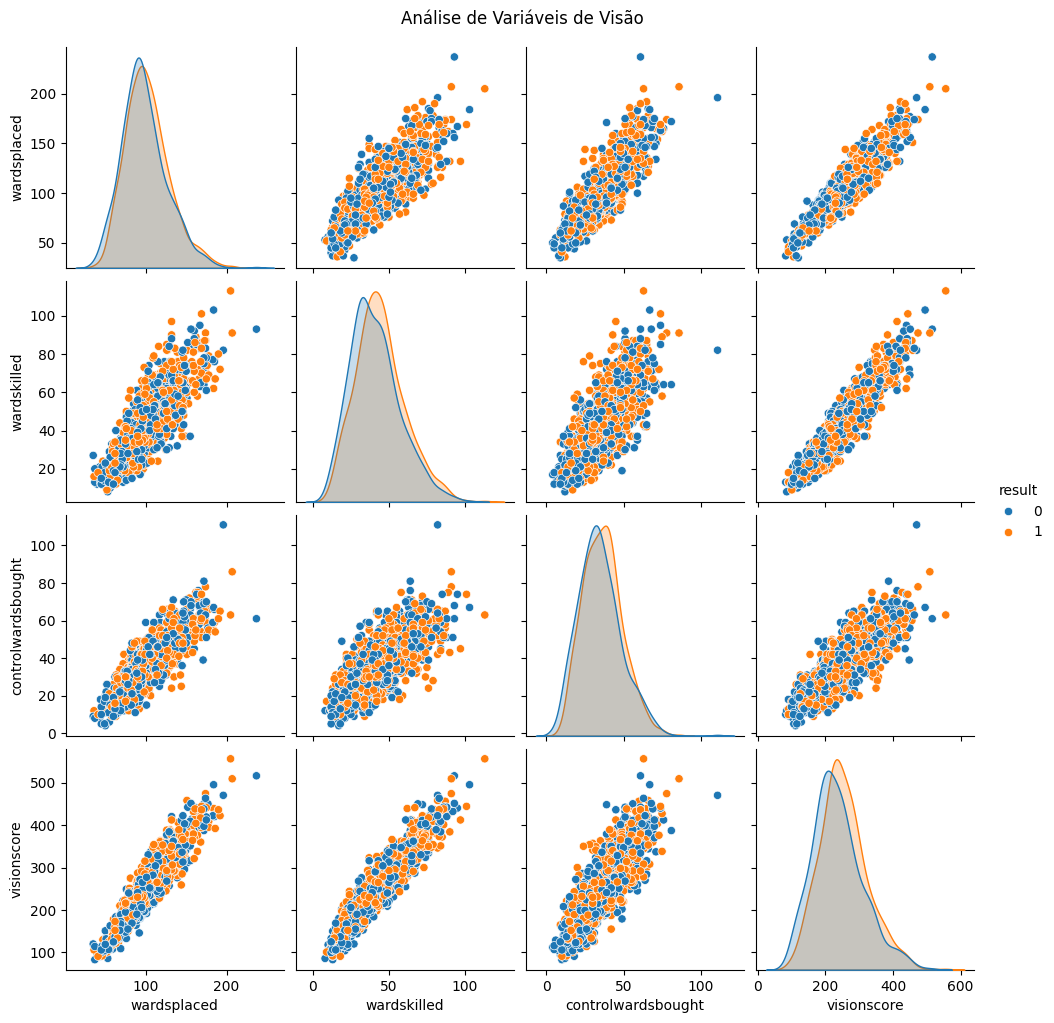

In [ ]:
vision_vars = ['wardsplaced','wardskilled','controlwardsbought','visionscore']

plt.figure(figsize=(10,6))
sns.pairplot(df[vision_vars + ['result']], hue='result')
plt.suptitle('Análise de Variáveis de Visão', y=1.02)
plt.show()

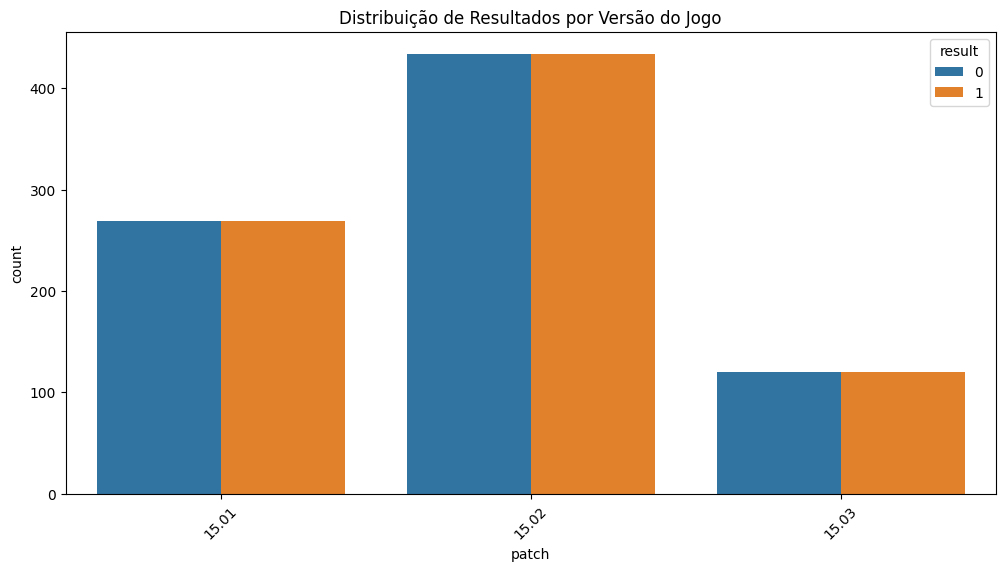

In [ ]:
time_vars = ['year','split','playoffs','patch']

plt.figure(figsize=(12,6))
sns.countplot(x='patch', hue='result', data=df)
plt.title('Distribuição de Resultados por Versão do Jogo')
plt.xticks(rotation=45)
plt.show()

In [ ]:
corr_matrix = df.corr(numeric_only=True)
top_corr = corr_matrix['result'].abs().sort_values(ascending=False).head(16)[1:]
top_corr.to_frame('Correlação com Resultado').style.background_gradient(cmap='viridis')

,Correlação com Resultado
towers,0.894316
opp_towers,0.894316
earned gpm,0.865648
gspd,0.795946
opp_inhibitors,0.765282
inhibitors,0.765282
gpr,0.731079
team kpm,0.707610
assists,0.692096
kills,0.685938


In [ ]:
obj_table = pd.pivot_table(df, index='result', values=['firstblood','firstdragon','firstherald','firstbaron'], aggfunc='mean')
print(obj_table.T)

result              0         1
firstbaron   0.110571  0.697448
firstblood   0.417983  0.582017
firstdragon  0.445930  0.554070
firstherald  0.335358  0.658566


In [ ]:
economy_table = df.groupby('result')[['goldat10','goldat15','goldat20','golddiffat10','golddiffat15']].mean()
economy_table.apply(lambda x: round(x/1000,1))

,goldat10,goldat15,goldat20,golddiffat10,golddiffat15
result,,,,,
0,15.6,24.1,32.9,-0.5,-1.5
1,16.2,25.6,35.7,0.5,1.5


In [ ]:
multi_kills = df.groupby('result')[['doublekills','triplekills','quadrakills','pentakills']].sum()
multi_kills.style.format('{:.0f}')

,doublekills,triplekills,quadrakills,pentakills
result,,,,
0,658,78,6,0
1,2272,414,50,10


In [ ]:
vision_table = df.groupby('result')[['wardsplaced','wardskilled','controlwardsbought']].mean().round(1)
vision_table.style.format('{:.0f}')

,wardsplaced,wardskilled,controlwardsbought
result,,,
0,98,41,34
1,102,44,36


In [ ]:
champ_winrate = df.groupby('champion')['result'].agg(['count','mean']).query('count >= 50').sort_values('mean', ascending=False).head(10)
champ_winrate.style.format({'mean': '{:.2%}', 'count': '{:.0f}'})

,count,mean
champion,,


In [ ]:
# 1. Renomear coluna existente 'champion' (se necessário)
df = df.rename(columns={'champion': 'player_champion'})

# 2. Criar lista de picks com nome único
picks_columns = ['pick1','pick2','pick3','pick4','pick5']
champ_data = df.melt(
    id_vars=['gameid','result'],
    value_vars=picks_columns,
    var_name='pick_position',
    value_name='picked_champion'  # Nome único
)

# 3. Análise de Win Rate
champ_winrate = (champ_data.groupby('picked_champion')['result']
                 .agg(games=('count'), win_rate=('mean'))
                 .query('games >= 50')
                 .sort_values('win_rate', ascending=False)
                 .head(10))

# 4. Formatação final
champ_winrate.style.format({'win_rate': '{:.2%}', 'games': '{:.0f}'})

,games,win_rate
picked_champion,,
Xayah,53,62.26%
Poppy,112,61.61%
Kai'Sa,134,60.45%
Rumble,174,59.77%
Viego,124,58.87%
Nautilus,168,58.33%
Pantheon,54,57.41%
Taliyah,111,56.76%
Skarner,71,56.34%


In [ ]:
# Ban vs Win Rate
ban_columns = ['ban1','ban2','ban3','ban4','ban5']
ban_data = df.melt(id_vars=['gameid'],
                  value_vars=ban_columns,
                  value_name='banned_champion')

ban_analysis = (ban_data.groupby('banned_champion')['gameid']
                .nunique()
                .sort_values(ascending=False)
                .head(20))
print(ban_analysis)

banned_champion
Skarner     702
Kalista     489
K'Sante     330
Varus       292
Ambessa     263
Corki       253
Vi          235
Aurora      229
Maokai      223
Rumble      220
Poppy       210
Viktor      206
Zyra        199
Jayce       192
Nocturne    173
Ashe        154
Orianna     153
Rell        145
Sejuani     141
Yone        140
Name: gameid, dtype: int64
